# ITD140 Assignment 6: Introduction to Unsupervised Machine Learning

The goal of this assignment is to provide an introduction to the application of unsupervised machine learning algorithms. The assignment assumes the student has mastered the contnent of a college level basic statistics course, has completed or is concurrently enrolled in a Python programming course, or has completed another modern language programming course and has the skills required to consult Python programming documentation to complete the tasks. The assignment is designed to allow the student to understand and explore the dataset used for the remainder of the class, and practice and troubleshoot Python and Jupyter Notebook mechanics.

## EXTREMELY IMPORTANT: Failure to follow these instructions will negatively impact your grade!

1. **NAMING CONVENTION:** Ensure that your submission follows the naming convention `ITD140.W2A2_LnameFIMI`.
   - Example: `ITD140W2A2_WalkerJT`
   - Failure to follow this convention will make it very challenging for me to find your work after I download it for grading or it may be over-written by the work of other students.
   - **I will not search for your work if the naming convention is not followed, and you will receive a zero for this assignment.**
2. **DARK MODE:** Do not submit your work in dark mode, including screenshots! You will loose 50% of your grade.
3. **Ensure Proper Submission:** Follow all instructions carefully to avoid deductions. Use your name as reflected in Canvas, not SIS.

   <b style="color: blue">Last Name:</b> Gerges

   <b style="color: blue">First Name:</b> Adel

   <b style="color: blue">Student ID Number:</b> 8290027

**Using the `CollegeData.csv` dataset, students will complete the following tasks, leveraging concepts and techniques covered this week.**

## **Task 1: Cluster Students Based on Academic Performance (K-Means, Euclidean Distance)** - 10 points
- 👉 Question: Cluster students based on SAT Math, SAT Verbal, and GPA (CAQPR) using K-Means. How many clusters do you find, and what are their characteristics?
- Instruction:
  - Display the appropriate clusters and their centroids.
  - Ensure data preprocessing / cleaning.
  - Ensure appropriate scaling.
  - Ensure chart title and legend is present.

### <span style="color: blue">Insert your code below this text and execute the code - 10 points:</span>

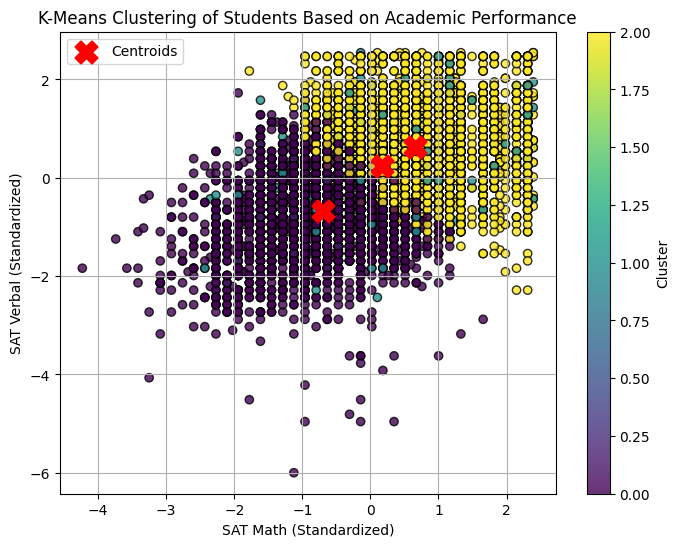

                     SAT_M       SAT_V     CAQPR
kmeans_cluster                                  
0               616.381503  588.672832  2.561815
1               669.154013  649.501085  0.349653
2               698.540553  675.558155  3.107324


In [20]:
# Import required libraries
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set environment variable to suppress joblib warning
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Replace 4 with your logical core count

# Define the file path for the dataset
file_path = "C:\\CollegeData.csv"

# Load dataset from CSV file
college_data = pd.read_csv(file_path)

# Drop missing values
college_data.dropna(inplace=True)

# Select relevant features for clustering
X = college_data[['SAT_M', 'SAT_V', 'CAQPR']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Set n_init correctly
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataset
college_data['kmeans_cluster'] = kmeans_labels

# Extract centroids (already standardized)
centroids = kmeans.cluster_centers_

# Visualize clusters with centroids using the first two features (SAT Math vs SAT Verbal)
plt.figure(figsize=(8, 6))

# Scatter plot of data points
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='black', alpha=0.8)

# Scatter plot of centroids (fixed edgecolor issue)
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    marker='X', s=250, color='red', linewidth=1.5, label="Centroids"
)

# Add plot labels and title
plt.xlabel("SAT Math (Standardized)")
plt.ylabel("SAT Verbal (Standardized)")
plt.title("K-Means Clustering of Students Based on Academic Performance")

# Add color bar for clusters
plt.colorbar(scatter, label="Cluster")
plt.legend()
plt.grid()
plt.show()

# Display cluster statistics (mean values per cluster)
cluster_summary = college_data.groupby('kmeans_cluster')[['SAT_M', 'SAT_V', 'CAQPR']].mean()
print(cluster_summary)

**How many clusters do you find, and what are their characteristics?** Enter your response below.

<span style="color: red">Any reasonable response that shows the student considered the question will work. Responses will not be evaluated for correctness until the Model Evaluation and Hyperparameter Tuning lecture.

## **Task 2: Detect Outliers in Student Status (DBSCAN, Jaccard Distance)** - 10 Points
- 👉 Question: Use DBSCAN to detect outliers based on whether students have different academic honors (Dean’s List, Super List, Varsity). How many outliers are detected?
- Instruction:
  - Display the appropriate clusters and their centroids.
  - Ensure data preprocessing / cleaning.
  - Ensure appropriate scaling.
  - Ensure chart title and legend is present.

Number of detected outliers: 0
Empty DataFrame
Columns: [DEANS_LST, SUPE_LST, VARSITY]
Index: []


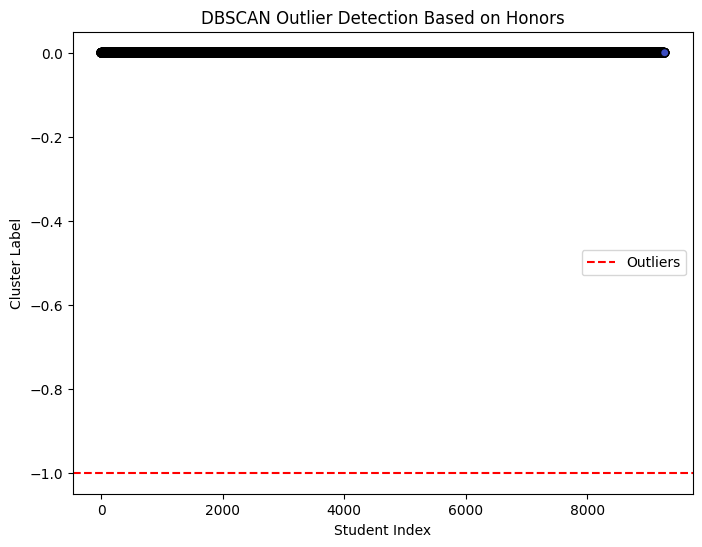

In [21]:
# Insert your code below this text and execute the code.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances

# Assume dataset location at C:\
file_path = "C:\\CollegeData.csv"
college_data = pd.read_csv(file_path)

# Drop missing values
college_data.dropna(inplace=True)

# Select categorical features (convert to binary format and ensure boolean type)
X_binary = pd.get_dummies(college_data[['DEANS_LST', 'SUPE_LST', 'VARSITY']], drop_first=True).astype(bool).values

# Compute Jaccard distances
jaccard_distances = pairwise_distances(X_binary, metric="jaccard")

# Apply DBSCAN with Jaccard distance
dbscan = DBSCAN(metric="precomputed", eps=0.3, min_samples=3)
dbscan_labels = dbscan.fit_predict(jaccard_distances)

# Add cluster labels to the dataset
college_data['dbscan_cluster'] = dbscan_labels

# Count the number of outliers (-1 label)
num_outliers = (dbscan_labels == -1).sum()
print(f"Number of detected outliers: {num_outliers}")

# Display the outliers
outliers = college_data[college_data['dbscan_cluster'] == -1]
print(outliers[['DEANS_LST', 'SUPE_LST', 'VARSITY']])

# Visualize the clustering
plt.figure(figsize=(8, 6))
scatter = plt.scatter(range(len(dbscan_labels)), dbscan_labels, c=dbscan_labels, cmap='coolwarm', edgecolors='k')
plt.xlabel("Student Index")
plt.ylabel("Cluster Label")
plt.title("DBSCAN Outlier Detection Based on Honors")
plt.axhline(y=-1, color='r', linestyle='--', label="Outliers")
plt.legend()

**How many outliers are detected?** Enter your response below.

<span style="color: red">No outliers are detected. Any reasonable response that shows the student considered the question will work. Responses will not be evaluated for correctness until the Model Evaluation and Hyperparameter Tuning lecture.<span style="color: red">

## **Task 3: Visualize Student Data in 2D Space (t-SNE, Euclidean Distance)** - 10 Points
- 👉 Question: Use t-SNE to visualize how students relate to each other based on SAT scores and GPA. What patterns emerge in the 2D space?
- Instruction:
  - Display the appropriate clusters and their centroids.
  - Ensure data preprocessing / cleaning.
  - Ensure appropriate scaling.
  - Ensure chart title and legend is present.

### <span style="color: blue">Insert your code below this text and execute the code - 10 points:</span>

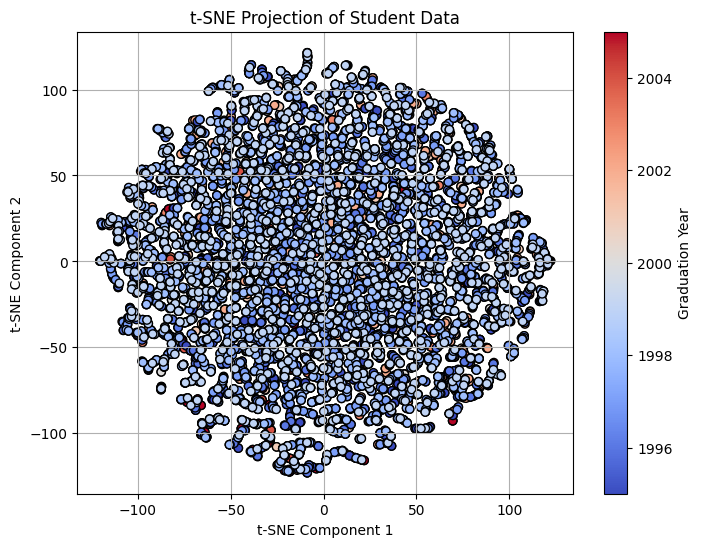

In [22]:
# Insert your code below this text and execute the code.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Assume dataset location at C:\
file_path = "C:\\CollegeData.csv"
college_data = pd.read_csv(file_path)

# Drop missing values
college_data.dropna(inplace=True)

# Select features for t-SNE
X = college_data[['SAT_M', 'SAT_V', 'CAQPR']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, metric="euclidean", perplexity=5, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the t-SNE projection
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=college_data['GRAD_YR'], cmap='coolwarm', edgecolors='k')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Projection of Student Data")
plt.colorbar(scatter, label="Graduation Year")
plt.grid()
plt.show()

**What patterns emerge in the 2D space?** Enter your response below.

<span style="color: red">Any reasonable response that shows the student considered the question will work. Responses will not be evaluated for correctness until the Model Evaluation and Hyperparameter Tuning lecture."

## **Task 4: Group Students by Academic Honors (Hierarchical Clustering, Hamming Distance)** - 10 Points
- 👉 Question: Use Hierarchical Clustering with Hamming distance to group students based on whether they received honors (Dean’s List, Super List, Varsity). What patterns emerge from the dendrogram?
- Instruction:
  - Display the appropriate clusters and their centroids.
  - Ensure data preprocessing / cleaning.
  - Ensure appropriate scaling.
  - Ensure chart title and legend is present.
- **HINTS** This problem requires handling of a large dendogram if the dataset is not reduced. As a resylt the following hints are provided to address potential erros that my occur without memory handeling.
  -  Set the recursion limit to 10000 after importing `sys`
  -  Ensure you use the `Ward` method for computing the euclidian distance.
  -  Use a truncated dendogram not the complete dendogram. A good limit is 50 or below clusters.
  -  Consider reducing font sizes and adjust rotation of output.
  
### <span style="color: blue">Insert your code below this text and execute the code - 10 points:</span>

**What patterns emerge from the dendrogram?** Enter your response below.

<span style="color: red">Any reasonable response that shows the student considered the question will work. Responses will not be evaluated for correctness until the Model Evaluation and Hyperparameter Tuning lecture."

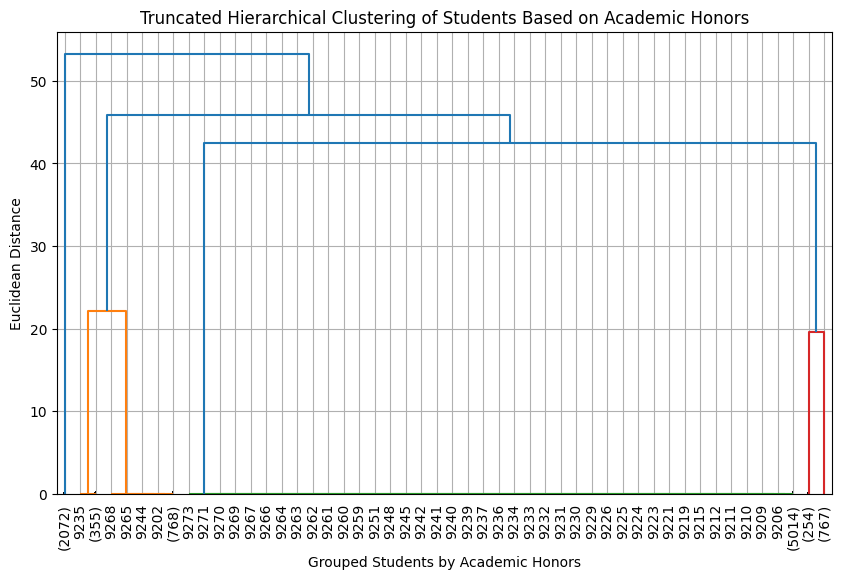

In [23]:
# Insert your code below this text and execute the code.
import sys
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Increase recursion limit to handle large dendrograms
sys.setrecursionlimit(10000)

# Assume dataset location at C:\
file_path = "C:\\CollegeData.csv"
college_data = pd.read_csv(file_path)

# Drop missing values
college_data.dropna(inplace=True)

# Select categorical features (convert to binary format)
X_binary = pd.get_dummies(college_data[['DEANS_LST', 'SUPE_LST', 'VARSITY']], drop_first=True)

# Compute Euclidean distances
euclidean_distances = pdist(X_binary, metric="euclidean")

# Perform hierarchical clustering using 'ward' method
linked = linkage(euclidean_distances, method="ward")

# Generate and display a truncated dendrogram
plt.figure(figsize=(10, 6))
dendrogram(
    linked,
    truncate_mode='lastp',  # Show only the last p merged clusters
    p=50,                    # Display the top 50 clusters
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True  # Show simplified links
)
plt.title("Truncated Hierarchical Clustering of Students Based on Academic Honors")
plt.xlabel("Grouped Students by Academic Honors")
plt.ylabel("Euclidean Distance")
plt.grid()
plt.show()

**What patterns emerge from the dendrogram?** Enter your response below.

<span style="color: red">Any reasonable response that shows the student considered the question will work. Responses will not be evaluated for correctness until the Model Evaluation and Hyperparameter Tuning lecture."

## **Task 5: Cluster Students Based on Extracurricular Activities (K-Means, Euclidean Distance)** - 10 Points
- 👉 Question: Use K-Means clustering to categorize students based on their involvement in athletic and combined extracurricular activities (ECA). How do the clusters differ in terms of student participation?
- Instruction:
  - Display the appropriate clusters and their centroids.
  - Display cluster statistics.
  - Ensure data preprocessing / cleaning.
  - Ensure appropriate scaling.
  - Ensure chart title and legend is present.

### <span style="color: blue">Insert your code below this text and execute the code - 10 points:</span>

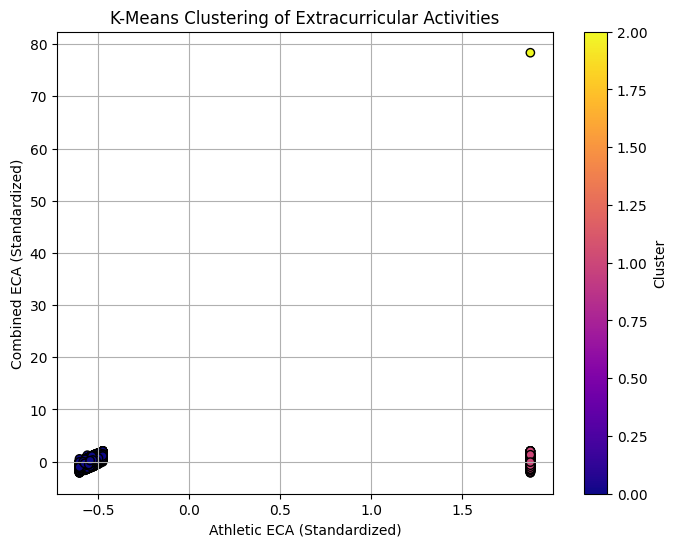

                        ATH_ECA     COMB_ECA
kmeans_eca_cluster                          
0                    566.175045   557.559064
1                   9999.000000   545.971735
2                   9999.000000  9999.000000


In [24]:
# Insert your code below this text and execute the code.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assume dataset location at C:\
file_path = "C:\\CollegeData.csv"
college_data = pd.read_csv(file_path)

# Drop missing values
college_data.dropna(inplace=True)

# Select relevant features
X = college_data[['ATH_ECA', 'COMB_ECA']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataset
college_data['kmeans_eca_cluster'] = kmeans_labels

# Visualize clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='plasma', edgecolors='k')
plt.xlabel("Athletic ECA (Standardized)")
plt.ylabel("Combined ECA (Standardized)")
plt.title("K-Means Clustering of Extracurricular Activities")
plt.colorbar(scatter, label="Cluster")
plt.grid()
plt.show()

# Display cluster statistics
cluster_summary = college_data.groupby('kmeans_eca_cluster')[['ATH_ECA', 'COMB_ECA']].mean()
print(cluster_summary)

**How do the clusters differ in terms of student participation?** Enter your response below.

<span style="color: red">Any reasonable response that shows the student considered the question will work. Responses will not be evaluated for correctness until the Model Evaluation and Hyperparameter Tuning lecture.

## **Task 6: Identify GPA Trends Among Students Based on Honors (K-Means, Euclidean Distance)** - 10 Points
- 👉 Question: Use K-Means clustering to categorize students based on GPA (CAQPR) and whether they have received academic honors (DEANS_LST). Do students with honors have significantly different GPA distributions?
- Instruction:
  - Display the appropriate clusters and their centroids.
  - Ensure data preprocessing / cleaning.
  - Ensure appropriate scaling.
  - Ensure chart title and legend is present.

### <span style="color: blue">Insert your code below this text and execute the code - 10 points:</span>

Dean's List Status Value Counts:
DEANS_LST
0    8253
1    1021
Name: count, dtype: int64


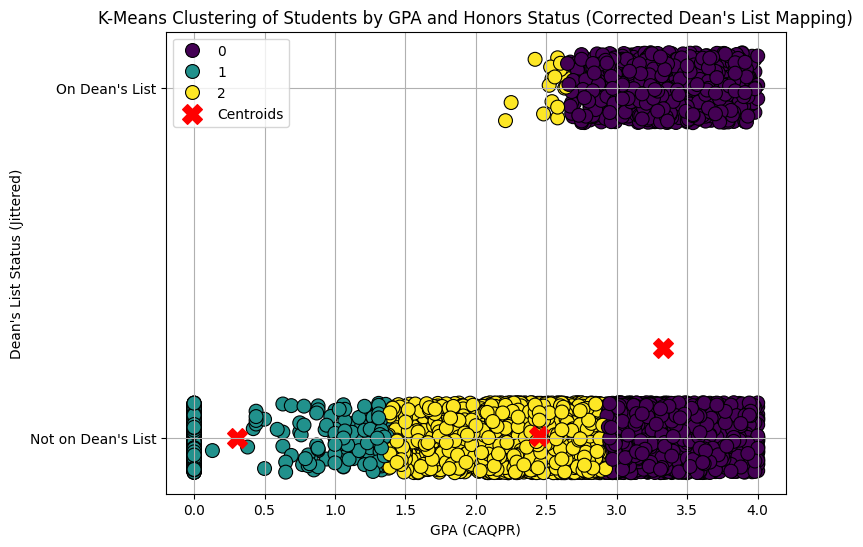


Cluster Summary:
                              CAQPR  DEANS_LST
kmeans_gpa_honors_cluster                     
0                          3.329855   0.255612
1                          0.305339   0.000000
2                          2.449283   0.003880


In [25]:
# Insert your code below this text and execute the code.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

# Assume dataset location at C:\
file_path = "C:\\CollegeData.csv"
college_data = pd.read_csv(file_path)

# Drop missing values
college_data.dropna(inplace=True)

# Correct mapping for Dean's List status based on the Data Dictionary
# 101 = Yes (On Dean's List), 102 = No (Not on Dean's List)
college_data['DEANS_LST'] = college_data['DEANS_LST'].apply(lambda x: 1 if x == 101 else 0)

# Verify the mapping
print("Dean's List Status Value Counts:")
print(college_data['DEANS_LST'].value_counts())

# Select relevant features (Using regular GPA values, no standardization)
X = college_data[['CAQPR', 'DEANS_LST']]

# Apply K-Means clustering using original GPA values
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Add cluster labels to dataset
college_data['kmeans_gpa_honors_cluster'] = kmeans_labels

# Add jitter to the Dean's List status to avoid overlap in visualization
jitter_strength = 0.1
college_data['DEANS_LST_JITTER'] = college_data['DEANS_LST'] + np.random.uniform(-jitter_strength, jitter_strength, size=len(college_data))

# Visualize the clusters with centroids using original GPA values and jittered y-axis
plt.figure(figsize=(8, 6))
sns.scatterplot(x=college_data['CAQPR'], y=college_data['DEANS_LST_JITTER'], hue=kmeans_labels, palette='viridis', s=100, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids', marker='X')
plt.xlabel("GPA (CAQPR)")
plt.ylabel("Dean's List Status (Jittered)")
plt.title("K-Means Clustering of Students by GPA and Honors Status (Corrected Dean's List Mapping)")
plt.yticks([0, 1], ['Not on Dean\'s List', 'On Dean\'s List'])
plt.legend()
plt.grid()
plt.show()

# Display cluster statistics
cluster_summary = college_data.groupby('kmeans_gpa_honors_cluster')[['CAQPR', 'DEANS_LST']].mean()
print("\nCluster Summary:")
print(cluster_summary)

**Do students with honors have significantly different GPA distributions?** Enter your response below.

<span style="color: red">Any reasonable response that shows the student considered the question will work. Responses will not be evaluated for correctness until the Model Evaluation and Hyperparameter Tuning lecture.

## **Task 7: Detect Outliers in Student Admissions (DBSCAN, Jaccard Distance)** - 10 Points
- 👉 Question: Use `DBSCAN` to detect outliers based on categorical features like major group (MAJ_GRP) and application status (STATUS). How many outliers are detected, and what makes them unique?
- Instruction:
  - Display the appropriate clusters and their centroids.
  - Ensure data preprocessing / cleaning.
  - Ensure appropriate scaling.
  - Ensure chart title and legend is present.

### <span style="color: blue">Insert your code below this text and execute the code - 10 points:</span>

Number of detected outliers: 0
Empty DataFrame
Columns: [MAJ_GRP, STATUS]
Index: []


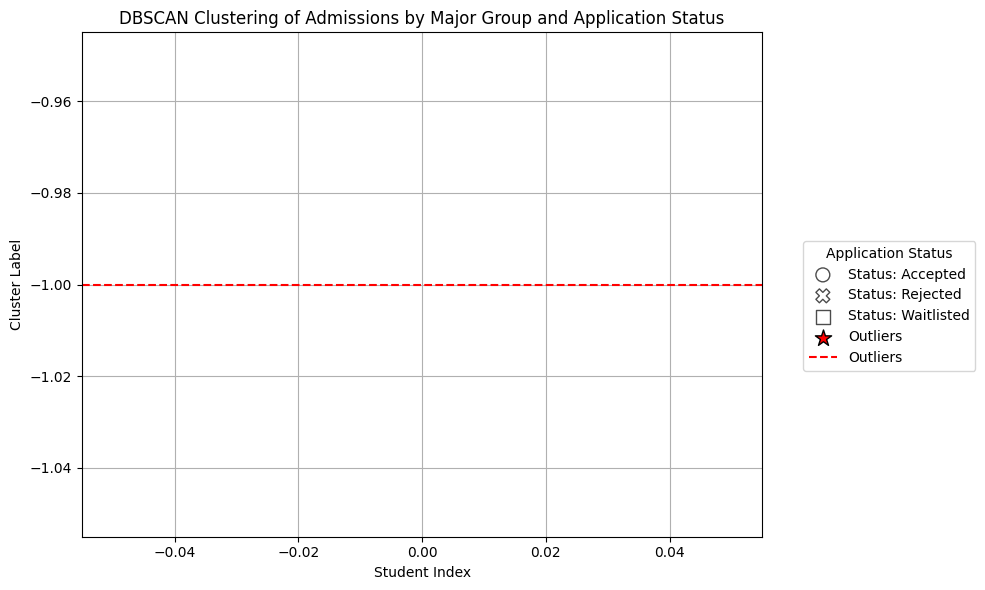

In [26]:
# Insert your code below this text and execute the code.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
import seaborn as sns

# Assume dataset location at C:\
file_path = "C:\\CollegeData.csv"
college_data = pd.read_csv(file_path)

# Drop missing values
college_data.dropna(inplace=True)

# Convert categorical features into binary format and then to boolean numpy array
X_binary = pd.get_dummies(college_data[['MAJ_GRP', 'STATUS']], drop_first=True).astype(bool).values

# Compute Jaccard distances for categorical data using a boolean array
jaccard_distances = pairwise_distances(X_binary, metric="jaccard")

# Apply DBSCAN clustering with adjusted parameters to improve clustering
dbscan = DBSCAN(metric="precomputed", eps=0.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(jaccard_distances)

# Add cluster labels to the dataset
college_data['dbscan_admissions_cluster'] = dbscan_labels

# Count the number of outliers (-1 label)
num_outliers = (dbscan_labels == -1).sum()
print(f"Number of detected outliers: {num_outliers}")

# Display the outliers
outliers = college_data[college_data['dbscan_admissions_cluster'] == -1]
print(outliers[['MAJ_GRP', 'STATUS']])

# Visualization of Clustering
plt.figure(figsize=(10, 6))

# Define color and marker mappings for categories
color_palette = sns.color_palette("tab10", n_colors=college_data['MAJ_GRP'].nunique())
major_group_colors = {maj_grp: color_palette[i] for i, maj_grp in enumerate(college_data['MAJ_GRP'].unique())}
status_markers = {'Accepted': 'o', 'Rejected': 'X', 'Waitlisted': 's'}

# Plot each point with colors and markers based on its category
for status, marker in status_markers.items():
    subset = college_data[college_data['STATUS'] == status]
    non_outliers = subset[subset['dbscan_admissions_cluster'] != -1]
    plt.scatter(
        x=non_outliers.index,
        y=non_outliers['dbscan_admissions_cluster'],
        c=[major_group_colors[maj_grp] for maj_grp in non_outliers['MAJ_GRP']],
        label=f"Status: {status}",
        marker=marker,
        edgecolors='k',
        s=100,
        alpha=0.7
    )

# Highlight outliers
outlier_points = college_data[college_data['dbscan_admissions_cluster'] == -1]
plt.scatter(
    x=outlier_points.index,
    y=outlier_points['dbscan_admissions_cluster'],
    c='red',
    label='Outliers',
    marker='*',
    s=150,
    edgecolors='k'
)

plt.xlabel("Student Index")
plt.ylabel("Cluster Label")
plt.title("DBSCAN Clustering of Admissions by Major Group and Application Status")
plt.axhline(y=-1, color='r', linestyle='--', label="Outliers")

# Add legends for major groups and status
major_group_legend = [plt.Line2D([0], [0], marker='o', color='w', label=maj_grp, markersize=10, 
                                 markerfacecolor=color) for maj_grp, color in major_group_colors.items()]
plt.legend(handles=major_group_legend, title="Major Groups", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.legend(title="Application Status", bbox_to_anchor=(1.05, 0.6), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

**How many outliers are detected, and what makes them unique?** Enter your response below.


<span style="color: red">Any reasonable response that shows the student considered the question will work. Responses will not be evaluated for correctness until the Model Evaluation and Hyperparameter Tuning lecture.

## **Task 8: Find Groups of Students with Similar Test Scores (Hierarchical Clustering, Hamming Distance)** - 10 Points
- 👉 Question: Use `Hierarchical Clustering` with `Hamming` distance to group students based on standardized test scores (CIS_STD, HIS_STD, TIS_STD). What patterns emerge from the `dendrogram`?
- Instruction:
  - Display the appropriate clusters.
  - Ensure data preprocessing / cleaning.
  - Ensure appropriate scaling.
  - Ensure chart title and legend is present.
- **IMPORTANT:** The solution output for this question will likely take as long as 5-10 minutes to materialize. If the output does not show after 10 minutes, your solution code needs further optimization!

### <span style="color: blue">Insert your code below this text and execute the code - 10 points:</span>

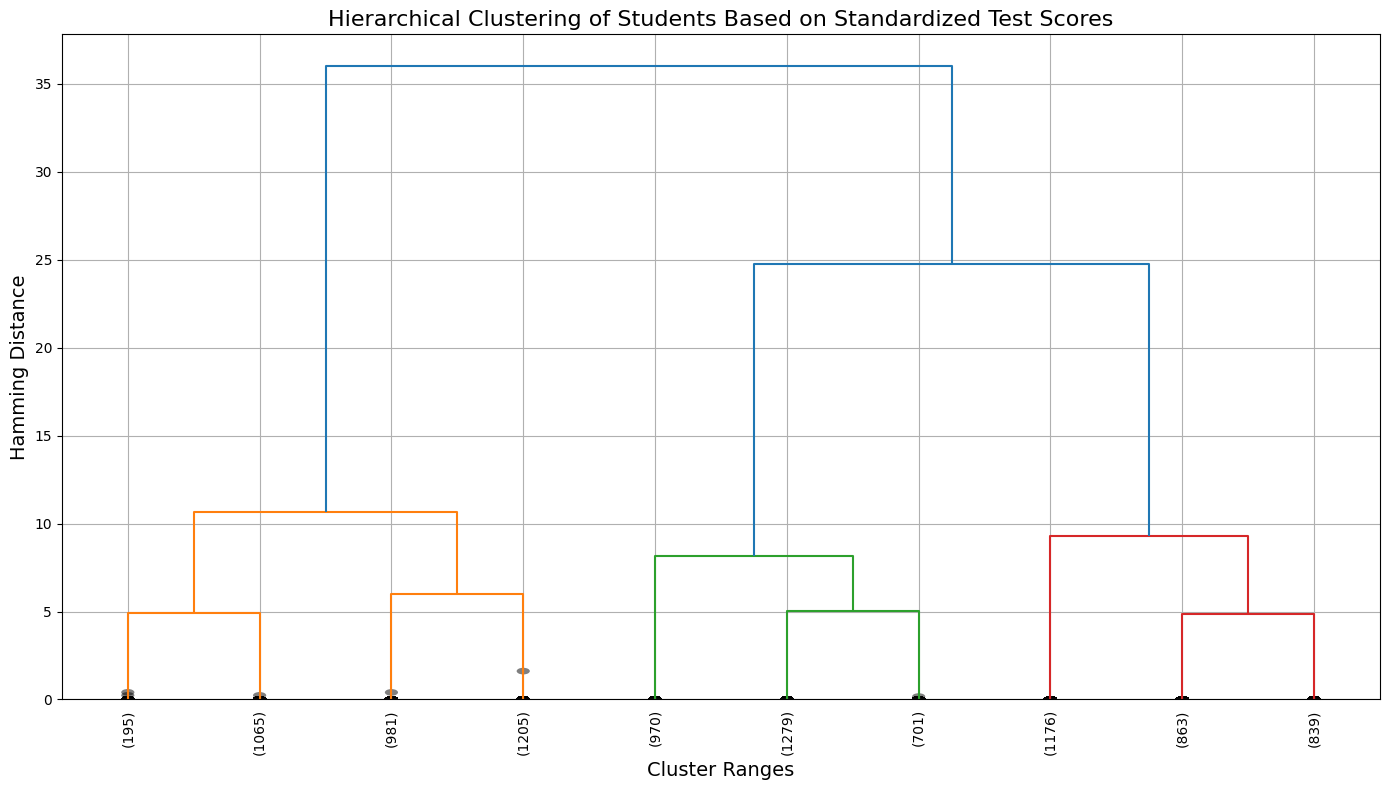

In [27]:
# Insert your code below this text and execute the code.

import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Assume dataset location at C:\
file_path = "C:\\CollegeData.csv"
college_data = pd.read_csv(file_path)

# Drop missing values
college_data.dropna(inplace=True)

# Convert test scores into categorical ranges (Low, Medium, High)
college_data['CIS_STD_CAT'] = pd.qcut(college_data['CIS_STD'], q=3, labels=['Low', 'Medium', 'High'])
college_data['HIS_STD_CAT'] = pd.qcut(college_data['HIS_STD'], q=3, labels=['Low', 'Medium', 'High'])
college_data['TIS_STD_CAT'] = pd.qcut(college_data['TIS_STD'], q=3, labels=['Low', 'Medium', 'High'])

# Convert categorical features to binary format
X_binary = pd.get_dummies(college_data[['CIS_STD_CAT', 'HIS_STD_CAT', 'TIS_STD_CAT']], drop_first=True)

# Compute Hamming distances
hamming_distances = pdist(X_binary, metric="hamming")

# Perform hierarchical clustering
linked = linkage(hamming_distances, method="ward")

# Define the number of clusters to display
p = 10  # Adjust the number of clusters for readability

# Generate the dendrogram with a limited number of clusters
plt.figure(figsize=(14, 8))

dendrogram(
    linked,
    truncate_mode='lastp',  # Show only the last p merged clusters
    p=p,                     # Number of clusters to display
    leaf_rotation=90,        # Rotate labels vertically for readability
    leaf_font_size=10,       # Increase font size
    show_contracted=True,    # Show info about collapsed clusters
    color_threshold=0.5 * max(linked[:, 2])  # Color clusters automatically
)

plt.title("Hierarchical Clustering of Students Based on Standardized Test Scores", fontsize=16)
plt.xlabel("Cluster Ranges", fontsize=14)  # Updated to remove student reference
plt.ylabel("Hamming Distance", fontsize=14)
plt.grid(True)
plt.tight_layout()  # Prevent label cutoff
plt.show()

**What patterns emerge from the dendrogram?** Enter your response below.

<span style="color: red">Any reasonable response that shows the student considered the question will work. Responses will not be evaluated for correctness until the Model Evaluation and Hyperparameter Tuning lecture.

## **Task 9: Identify Student Similarity Based on Rank (t-SNE, Euclidean Distance)** - 10 Points
- 👉 Question: Use `t-SNE` to visualize how students are ranked based on their order of merit (OOM) and standardized test scores (CIS_STD, HIS_STD, TIS_STD). What patterns emerge in the 2D projection?
- Instruction:
  - Display the `t-SNE` projection.
  - Ensure data preprocessing / cleaning.
  - Ensure appropriate scaling.
  - Ensure chart title and legend is present..

### <span style="color: blue">Insert your code below this text and execute the code - 10 points:</span>

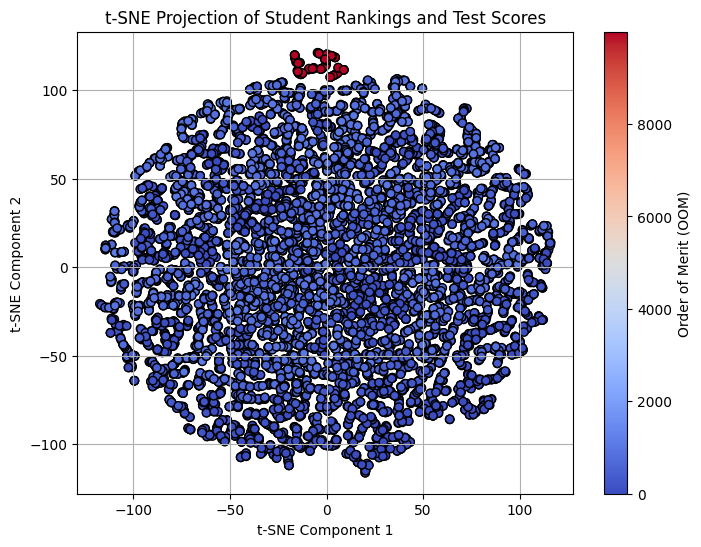

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Assume dataset location at C:\
file_path = "C:\\CollegeData.csv"
college_data = pd.read_csv(file_path)

# Drop missing values
college_data.dropna(inplace=True)

# Select relevant features
X = college_data[['OOM', 'CIS_STD', 'HIS_STD', 'TIS_STD']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, metric="euclidean", perplexity=5, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the t-SNE projection
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=college_data['OOM'], cmap='coolwarm', edgecolors='k')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Projection of Student Rankings and Test Scores")
plt.colorbar(scatter, label="Order of Merit (OOM)")
plt.grid()
plt.show()

**What patterns emerge in the 2D projection?** Enter your response below.

<span style="color: red">Any reasonable response that shows the student considered the question will work. Responses will not be evaluated for correctness until the Model Evaluation and Hyperparameter Tuning lecture.

## **Task 10: Predict Student Success Based on Admissions Data (K-Means, Euclidean Distance)** - 10 Points
- 👉 Question: Use `K-Means` clustering to categorize students based on their application profile, including SAT scores (SAT_M, SAT_V), GPA (CAQPR), and application status (STATUS). What insights can be drawn from the clusters?
- Instruction:
  - Display the appropriate clusters and their centroids.
  - Ensure data preprocessing / cleaning.
  - Ensure appropriate scaling.
  - Ensure chart title and legend is present.

### <span style="color: blue">Insert your code below this text and execute the code - 10 points:</span>

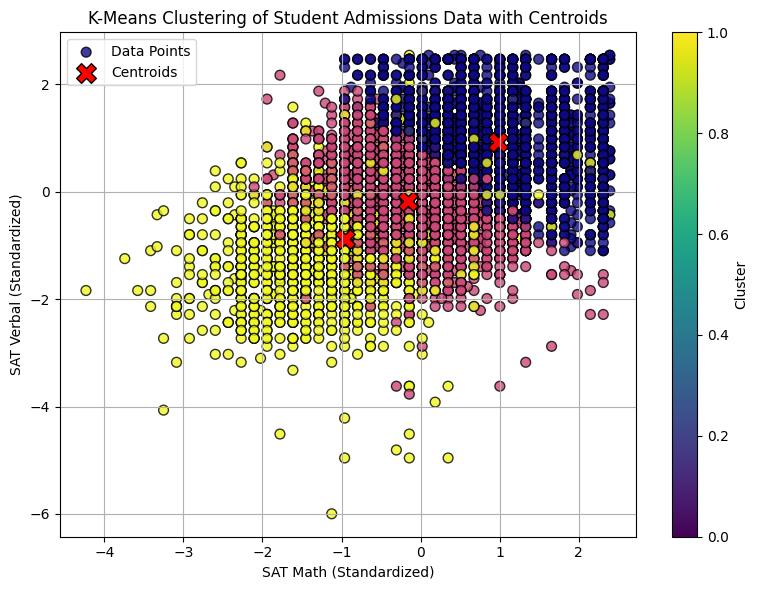


Cluster Summary:
                               SAT_M       SAT_V     CAQPR  STATUS
kmeans_admission_cluster                                          
0                         718.987573  696.842105  3.142098     0.0
1                         649.231461  622.466292  2.854369     0.0
2                         600.167625  575.095785  1.862064     0.0


In [29]:
# Insert your code below this text and execute the code.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assume dataset location at C:\
file_path = "C:\\CollegeData.csv"
college_data = pd.read_csv(file_path)

# Drop missing values
college_data.dropna(inplace=True)

# Convert categorical feature (Application Status) into binary (0 = Rejected, 1 = Accepted)
college_data['STATUS'] = college_data['STATUS'].apply(lambda x: 1 if x == 'Accepted' else 0)

# Select relevant features
X = college_data[['SAT_M', 'SAT_V', 'CAQPR', 'STATUS']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataset
college_data['kmeans_admission_cluster'] = kmeans_labels

# Plot clusters with centroids
plt.figure(figsize=(8, 6))

# Scatter plot of data points colored by cluster
scatter = plt.scatter(
    X_scaled[:, 0], X_scaled[:, 1], 
    c=kmeans_labels, cmap='plasma', 
    edgecolors='k', alpha=0.8, 
    s=50, label='Data Points'
)

# Plot centroids as larger red 'X' markers
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0], centroids[:, 1], 
    s=200, c='red', marker='X', 
    edgecolors='k', label='Centroids'
)

# Add legend to differentiate data points and centroids
plt.legend()

# Add labels and title
plt.xlabel("SAT Math (Standardized)")
plt.ylabel("SAT Verbal (Standardized)")
plt.title("K-Means Clustering of Student Admissions Data with Centroids")
plt.colorbar(label="Cluster")
plt.grid()
plt.tight_layout()

# Display the plot
plt.show()

# Display cluster statistics
cluster_summary = college_data.groupby('kmeans_admission_cluster')[['SAT_M', 'SAT_V', 'CAQPR', 'STATUS']].mean()
print("\nCluster Summary:")
print(cluster_summary)

**What insights can be drawn from the clusters?** Enter your response below.

<span style="color: red">Any reasonable response that shows the student considered the question will work. Responses will not be evaluated for correctness until the Model Evaluation and Hyperparameter Tuning lecture.

## Submission Instructions
1. Save this notebook with all your outputs included.
2. Download `[File | Download]`the notebook, **in the prescribed file naming convention.**
3. Submit the notebook file (`.ipynb`) to Canvas by the due date. You may also want to upload a PDF version of the assignment by opening the notebook in JupyterLab (see icon on top right of Jupyter Notebook environment) and `File | Print | Save as PDF`.
4. Ensure all steps are completed and all required screenshots are included.